In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, auc)
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import shap
import warnings
warnings.filterwarnings('ignore')

### 1. Data Loading and Initial Exploration

In [30]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [31]:
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
print("\nData types and missing values:")
display(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

None

In [33]:
print("\nDescriptive statistics:")
display(df.describe(include='all').T)


Descriptive statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values per column:
customerID: 7043 unique values
gender: 2 unique values
SeniorCitizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
tenure: 73 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
MonthlyCharges: 1585 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


### 2. Data Preprocessing and EDA

In [35]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [36]:
# Convert TotalCharges to numeric (it's currently object type)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [37]:
# Check missing values after conversion
print("Missing values in TotalCharges:", df['TotalCharges'].isnull().sum())

Missing values in TotalCharges: 11


In [38]:
# Impute missing values in TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [39]:
# Drop customer ID as it's not useful for modeling
df.drop('customerID', axis=1, inplace=True)

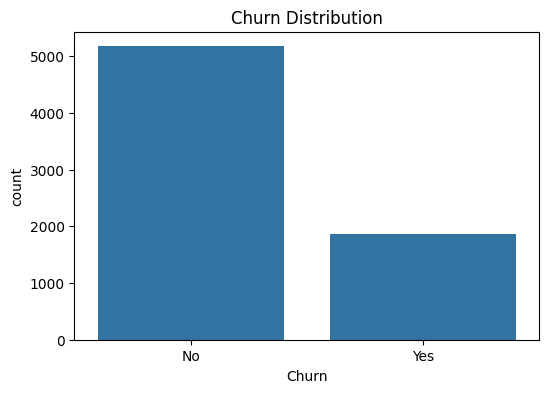

In [40]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [41]:
# Calculate churn rate
churn_rate = df['Churn'].value_counts(normalize=True)
print(f"Churn Rate:\n{churn_rate}")

Churn Rate:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


#### Numerical Features Analysis

In [42]:
# Select numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

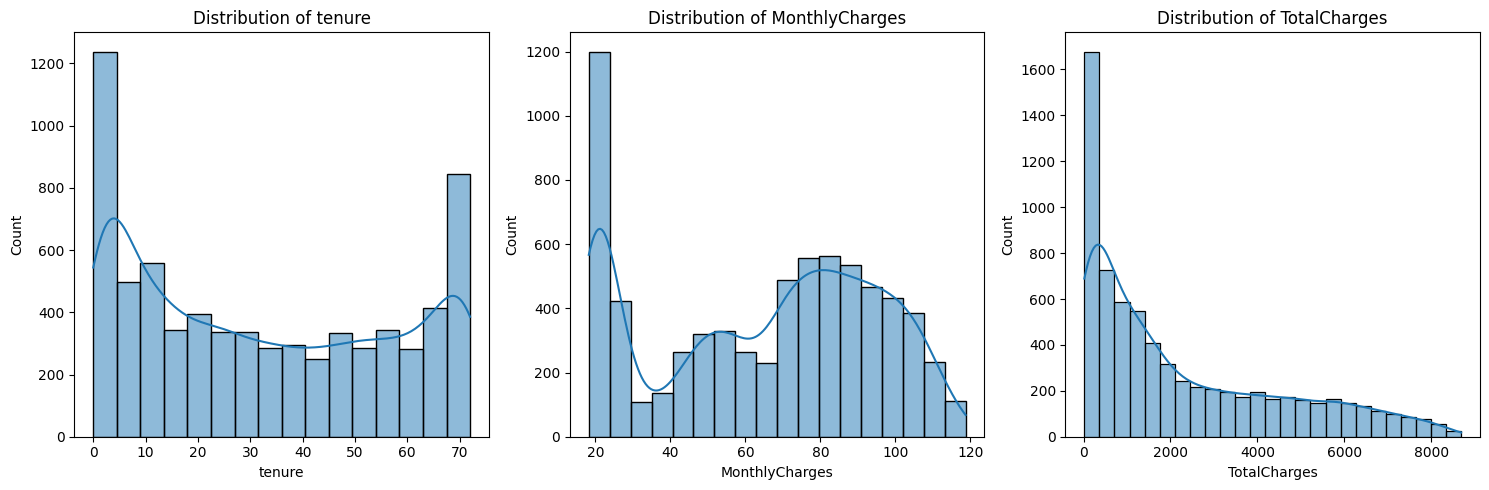

In [43]:
# Plot distributions of numerical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

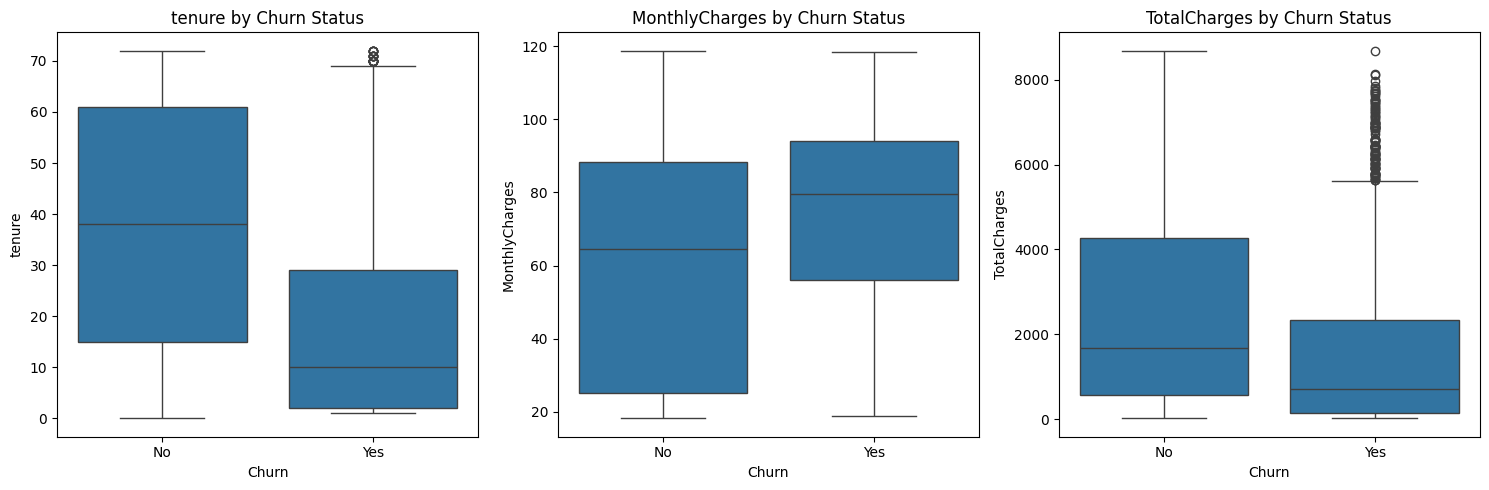

In [44]:
# Boxplots to check for outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn Status')
plt.tight_layout()
plt.show()

#### Categorical Features Analysis

In [45]:
# Select categorical columns (excluding the target)
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'Churn']

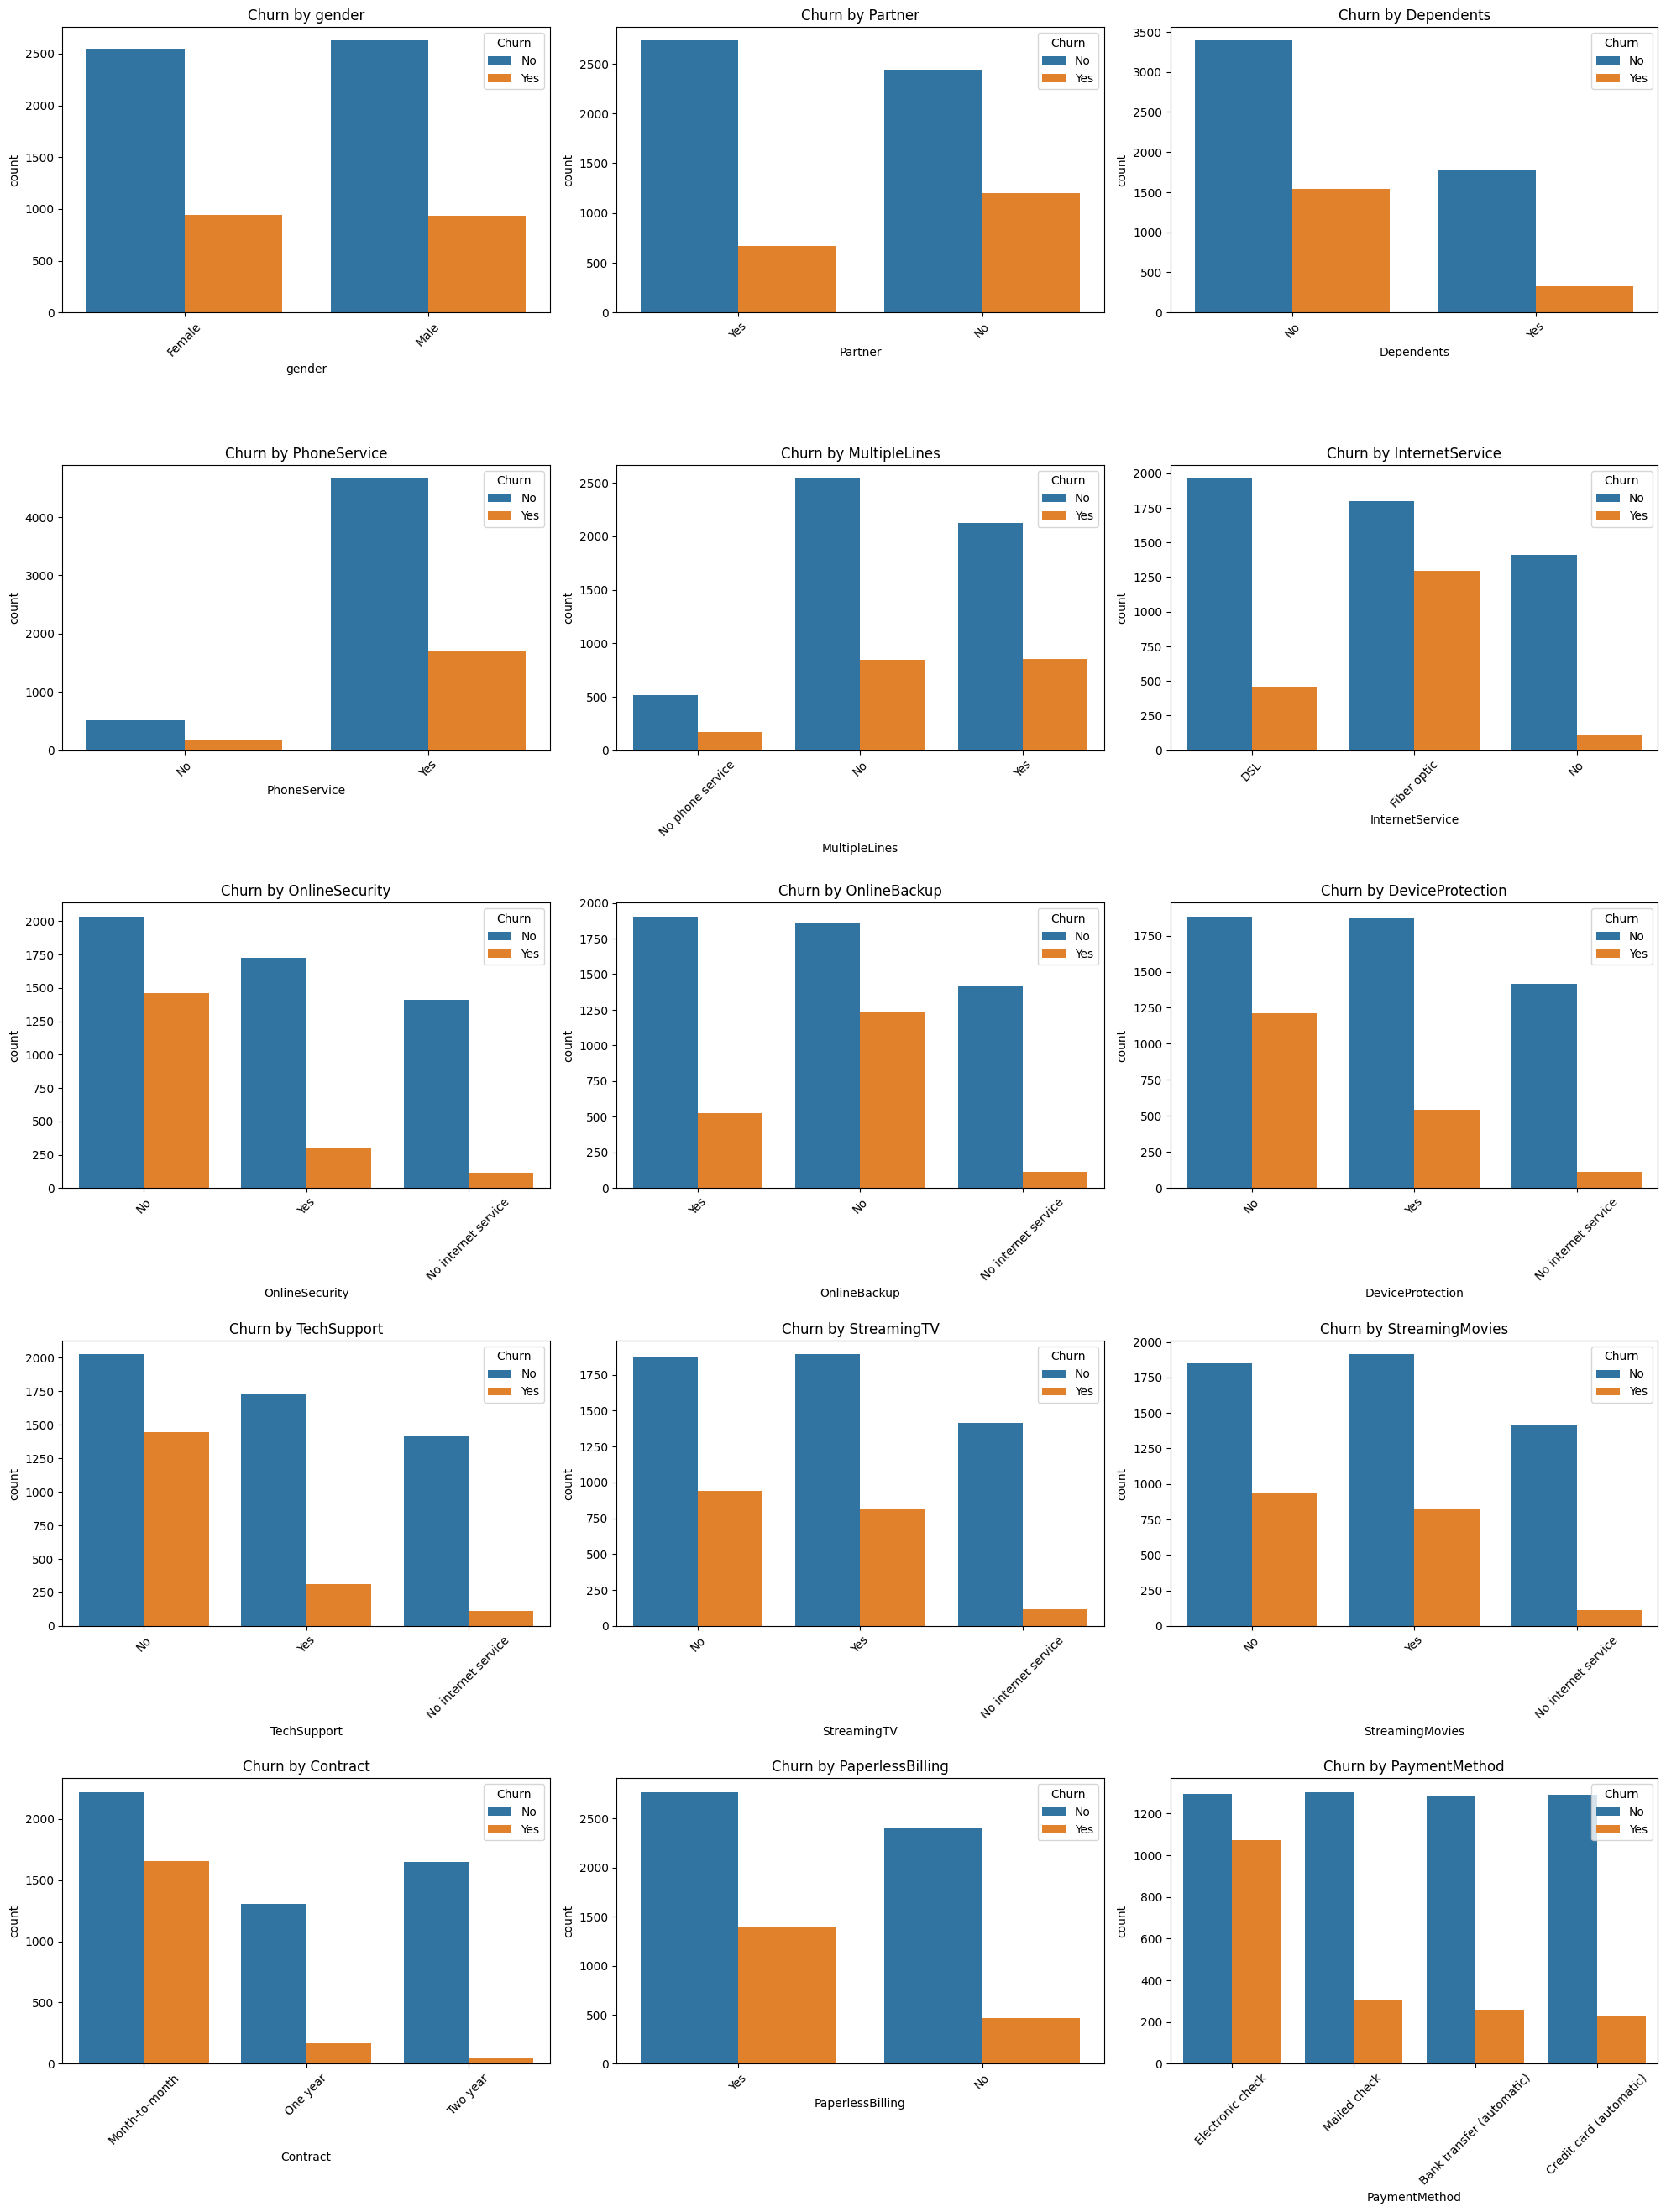

In [46]:
# Plot distributions of categorical features
plt.figure(figsize=(20, 30))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Feature Engineering

In [47]:
# Create new features
df['TenureGroup'] = pd.cut(df['tenure'], 
                           bins=[0, 12, 24, 36, 48, 60, 72], 
                           labels=['0-1yr', '1-2yr', '2-3yr', '3-4yr', '4-5yr', '5-6yr'])

In [48]:
# Update the feature engineering step to handle tenure=0 cases
df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure'].replace(0, 1)  # Replace 0 with 1 to avoid division by zero
df['AvgMonthlySpend'].fillna(df['MonthlyCharges'], inplace=True)  # Fill any remaining NaN with MonthlyCharges

# Add a check for infinite values
print("Number of infinite values in features:", np.isinf(df[numerical_cols]).sum().sum())

Number of infinite values in features: 0


In [49]:
# Create binary features for important services
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for service in services:
    if service in df.columns:
        if service=="InternetService":
            df[f'Has{service}'] = df[service].apply(lambda x: 0 if x == 'NO' else 1)
        else:
            df[f'Has{service}'] = df[service].apply(lambda x: 1 if x == 'Yes' else 0)

In [50]:
# Create feature for number of additional services
# creates a new feature NumAdditionalServices that counts how many additional services each customer has subscribed to (from the 6 listed services).

additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies']
df['NumAdditionalServices'] = df[additional_services].apply(lambda x: sum(x == 'Yes'), axis=1)

# Display new features
print(df[['TenureGroup', 'AvgMonthlySpend', 'NumAdditionalServices']].head())

  TenureGroup  AvgMonthlySpend  NumAdditionalServices
0       0-1yr        29.850000                      1
1       2-3yr        55.573529                      2
2       0-1yr        54.075000                      2
3       3-4yr        40.905556                      3
4       0-1yr        75.825000                      0


In [57]:
# Drop the original columns
df.drop(columns=services, axis=1, inplace=True)

In [58]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,AvgMonthlySpend,HasPhoneService,HasInternetService,HasOnlineSecurity,HasOnlineBackup,HasDeviceProtection,HasTechSupport,HasStreamingTV,HasStreamingMovies,NumAdditionalServices
0,Female,0,Yes,No,1,No phone service,Month-to-month,Yes,Electronic check,29.85,...,29.850000,0,1,0,1,0,0,0,0,1
1,Male,0,No,No,34,No,One year,No,Mailed check,56.95,...,55.573529,1,1,1,0,1,0,0,0,2
2,Male,0,No,No,2,No,Month-to-month,Yes,Mailed check,53.85,...,54.075000,1,1,1,1,0,0,0,0,2
3,Male,0,No,No,45,No phone service,One year,No,Bank transfer (automatic),42.30,...,40.905556,0,1,1,0,1,1,0,0,3
4,Female,0,No,No,2,No,Month-to-month,Yes,Electronic check,70.70,...,75.825000,1,1,0,0,0,0,0,0,0


In [59]:
# Add a check for infinite values
print("Number of infinite values in features:", np.isinf(df[numerical_cols]).sum().sum())

Number of infinite values in features: 0


In [60]:
# If there are any infinite values, replace them
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Verify no infinite values remain
assert not np.isinf(df[numerical_cols]).any().any(), "There are still infinite values in the data"

### 4. Data Preparation for Modeling

In [62]:
# Define target and features
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [63]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [64]:
# Define preprocessing for numerical and categorical features
# List of numerical columns (numbers that need scaling)
numerical_cols = [
    'tenure', 
    'MonthlyCharges', 
    'TotalCharges', 
    'AvgMonthlySpend', 
    'NumAdditionalServices'
]
# Add all "HasService" columns (like HasPhoneService, HasInternetService etc.)
for service in services:
    col_name = f'Has{service}'
    if col_name in df.columns:
        numerical_cols.append(col_name)

# All other columns (except TenureGroup) are categorical (text categories that need encoding)
categorical_cols = [col for col in X.columns 
                   if col not in numerical_cols 
                   and col != 'TenureGroup']

In [65]:
print("Numerical columns: ", numerical_cols)
print("Categorical columns: ", categorical_cols)

Numerical columns:  ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend', 'NumAdditionalServices', 'HasPhoneService', 'HasInternetService', 'HasOnlineSecurity', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupport', 'HasStreamingTV', 'HasStreamingMovies']
Categorical columns:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [66]:
# Create preprocessing pipeline, Imputer used to fill missing values then scaling and endoing applied.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

### 5. Model Training and Evaluation

In [67]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Churn', 'Churn'], 
                yticklabels=['No Churn', 'Churn'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob)
    }

### 5.1 Logistic Regression

In [68]:
# Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),                                         # Apply preprocessing (scaling, encoding)
    ('feature_selection', SelectKBest(score_func=f_classif, k=20)),         # Select top 20 features 
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))])    # Train Logistic Regression

# Hyperparameter tuning for Logistic Regression
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

lr_grid = GridSearchCV(lr_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'AvgMonthlySpend',
                                                                          'NumAdditionalServices',
                                                                          'HasPhoneService',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurity',
                                                                          'HasOnlineBackup'...
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('feature_selection', SelectKBest(k=20)),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='roc_auc')

Best parameters for Logistic Regression:
{'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy: 0.7892
Precision: 0.6271
Recall: 0.5080
F1 Score: 0.5613
ROC AUC: 0.8361


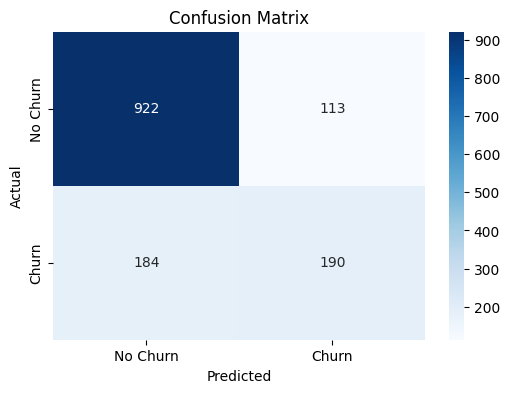

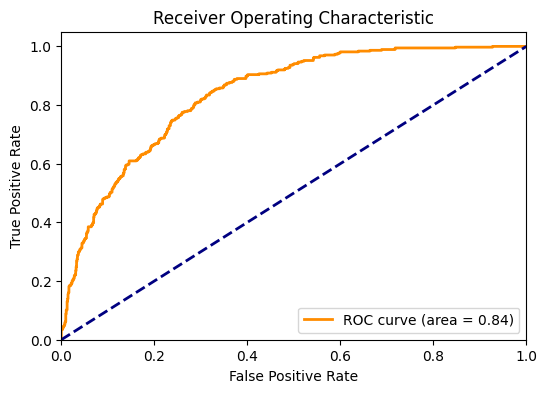

In [69]:
# Best parameters and evaluation
print("Best parameters for Logistic Regression:")
print(lr_grid.best_params_)

best_lr = lr_grid.best_estimator_
lr_metrics = evaluate_model(best_lr, X_test, y_test)

### 5.2 Random Forest

In [70]:
# Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])

# Hyperparameter tuning for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'AvgMonthlySpend',
                                                                          'NumAdditionalServices',
                                                                          'HasPhoneService',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurity',
                                                                          'HasOnlineBackup'...
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='roc_auc')

Best parameters for Random Forest:
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Accuracy: 0.8062
Precision: 0.6772
Recall: 0.5160
F1 Score: 0.5857
ROC AUC: 0.8443


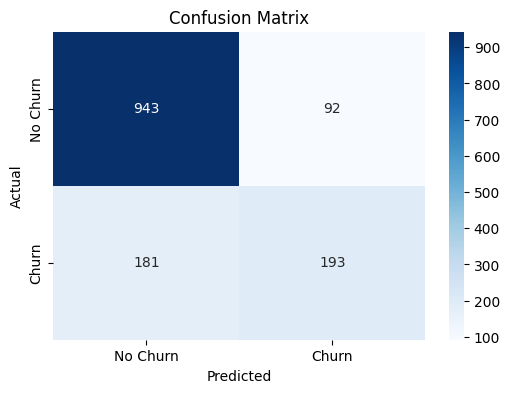

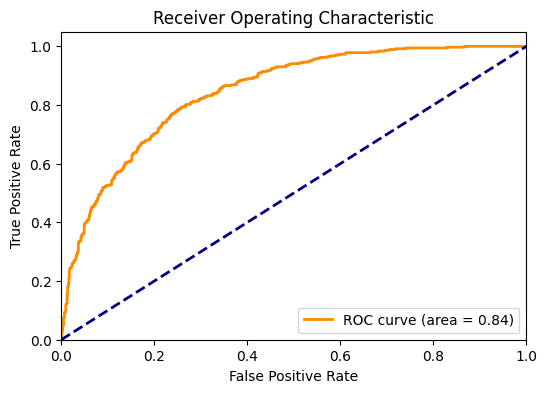

In [71]:
# Best parameters and evaluation
print("Best parameters for Random Forest:")
print(rf_grid.best_params_)

best_rf = rf_grid.best_estimator_
rf_metrics = evaluate_model(best_rf, X_test, y_test)

### 5.3 Gradient Boosting

In [72]:
# Gradient Boosting pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))])

# %%
# Hyperparameter tuning for Gradient Boosting
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__min_samples_split': [2, 5]
}

gb_grid = GridSearchCV(gb_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'AvgMonthlySpend',
                                                                          'NumAdditionalServices',
                                                                          'HasPhoneService',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurity',
                                                                          'HasOnlineBackup'...
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1],
                         'classifier__max_depth': [3, 5],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='roc_auc')

Best parameters for Gradient Boosting:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1035
           1       0.68      0.50      0.58       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.81      0.80      1409

Accuracy: 0.8055
Precision: 0.6825
Recall: 0.5000
F1 Score: 0.5772
ROC AUC: 0.8425


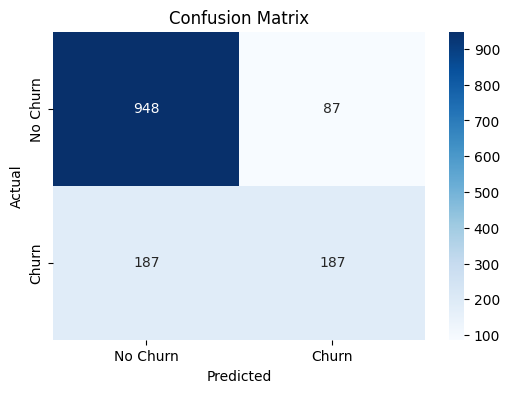

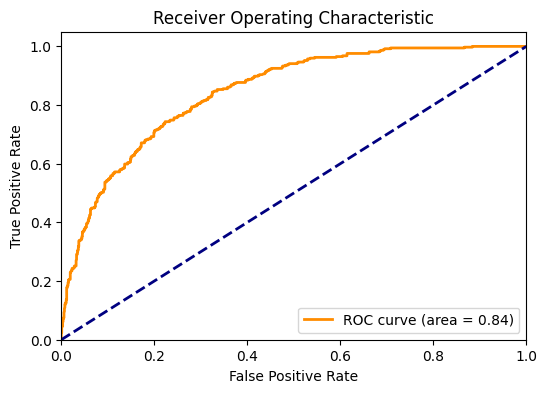

In [73]:
# Best parameters and evaluation
print("Best parameters for Gradient Boosting:")
print(gb_grid.best_params_)

best_gb = gb_grid.best_estimator_
gb_metrics = evaluate_model(best_gb, X_test, y_test)

### 5.4 Neural Network (Deep Learning)

In [74]:
# Preprocess data for neural network
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [75]:
# Get the number of features after preprocessing
if hasattr(preprocessor.transformers_[1][1].named_steps['onehot'], 'get_feature_names_out'):
    num_features = len(numerical_cols) + \
                  len(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out())
else:
    # For older sklearn versions
    num_features = len(numerical_cols) + \
                  len(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names(categorical_cols))

In [76]:
# Build neural network model
def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 
                 keras.metrics.Precision(name='precision'),
                 keras.metrics.Recall(name='recall'),
                 keras.metrics.AUC(name='auc')]
    )
    return model

In [80]:
# Create and train the model
nn_model = build_model(num_features)

# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,         # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Keep the best model weights
)

history = nn_model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight={0: 1, 1: 2},  # Give more weight to the minority class
    callbacks=[early_stopping],  # Add Early Stopping
    verbose=1
)

Epoch 1/50
141/141 [==============================] - 2s 7ms/step - loss: 0.7262 - accuracy: 0.7391 - precision: 0.5094 - recall: 0.5442 - auc: 0.7598 - val_loss: 0.5215 - val_accuracy: 0.7196 - val_precision: 0.4770 - val_recall: 0.7390 - val_auc: 0.8141
Epoch 2/50
141/141 [==============================] - 1s 7ms/step - loss: 0.6535 - accuracy: 0.7657 - precision: 0.5452 - recall: 0.7233 - auc: 0.8193 - val_loss: 0.4932 - val_accuracy: 0.7329 - val_precision: 0.4930 - val_recall: 0.7153 - val_auc: 0.8175
Epoch 3/50
141/141 [==============================] - 1s 6ms/step - loss: 0.6335 - accuracy: 0.7724 - precision: 0.5561 - recall: 0.7192 - auc: 0.8304 - val_loss: 0.4823 - val_accuracy: 0.7365 - val_precision: 0.4976 - val_recall: 0.6949 - val_auc: 0.8191
Epoch 4/50
141/141 [==============================] - 1s 7ms/step - loss: 0.6233 - accuracy: 0.7692 - precision: 0.5514 - recall: 0.7150 - auc: 0.8357 - val_loss: 0.4656 - val_accuracy: 0.7587 - val_precision: 0.5315 - val_recall: 0

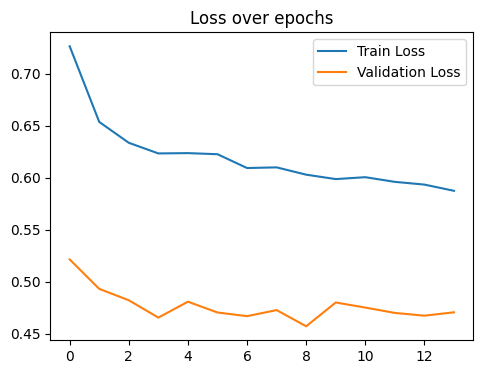

In [81]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.legend()

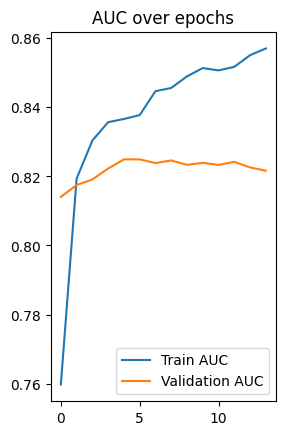

In [82]:
plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('AUC over epochs')
plt.legend()
plt.show()

In [83]:
# Evaluate neural network
y_pred_nn = (nn_model.predict(X_test_processed) > 0.5).astype(int)
y_prob_nn = nn_model.predict(X_test_processed)

print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

45/45 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.67      0.62       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



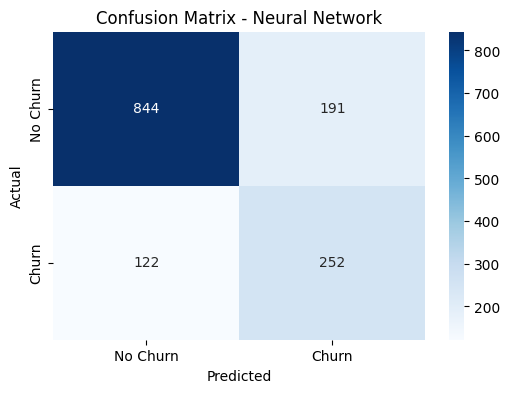

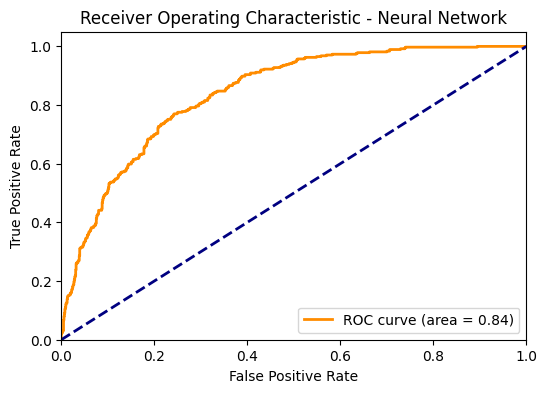

In [84]:
# Calculate metrics
nn_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_nn),
    'precision': precision_score(y_test, y_pred_nn),
    'recall': recall_score(y_test, y_pred_nn),
    'f1': f1_score(y_test, y_pred_nn),
    'roc_auc': roc_auc_score(y_test, y_prob_nn)
}

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Neural Network')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Neural Network')
plt.legend(loc="lower right")
plt.show()

#### Compare the model performance

In [93]:
metrics_df = pd.DataFrame({
    'Logistic Regression': lr_metrics,
    'Random Forest': rf_metrics,
    'Gradient Boosting': gb_metrics,
    'Neural Network': nn_metrics
}).T

print("Model Performance Comparison:")
display(metrics_df.style.highlight_max(color='lightgreen', axis=0))

Model Performance Comparison:


,accuracy,precision,recall,f1,roc_auc
Logistic Regression,0.789212,0.627063,0.508021,0.561300,0.836074
Random Forest,0.806246,0.677193,0.516043,0.585736,0.844326
Gradient Boosting,0.805536,0.682482,0.500000,0.577160,0.842485
Neural Network,0.777857,0.568849,0.673797,0.616891,0.838399


For best overall performance **Random Forest** provides the best balance.

### 7. Model Interpretation

In [85]:
# Get feature names after preprocessing
if hasattr(preprocessor.transformers_[1][1].named_steps['onehot'], 'get_feature_names_out'):
    categorical_features = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
else:
    # For older sklearn versions
    categorical_features = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names(categorical_cols)

all_features = numerical_cols + list(categorical_features)

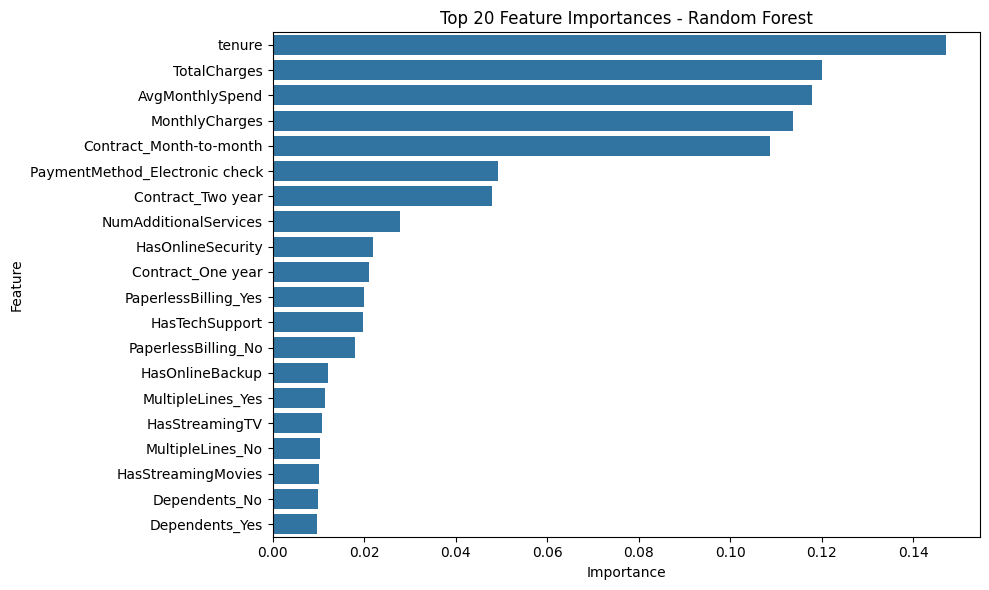

In [86]:
# Feature importance for Random Forest
rf_feature_importances = best_rf.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({'Feature': all_features, 'Importance': rf_feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

In [87]:
# SHAP values for Random Forest
# Get the preprocessed training data as a DataFrame
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_features)

# Create SHAP explainer
explainer = shap.TreeExplainer(best_rf.named_steps['classifier'])

# Calculate SHAP values (this may take time for large datasets)
shap_values = explainer.shap_values(X_train_processed_df)

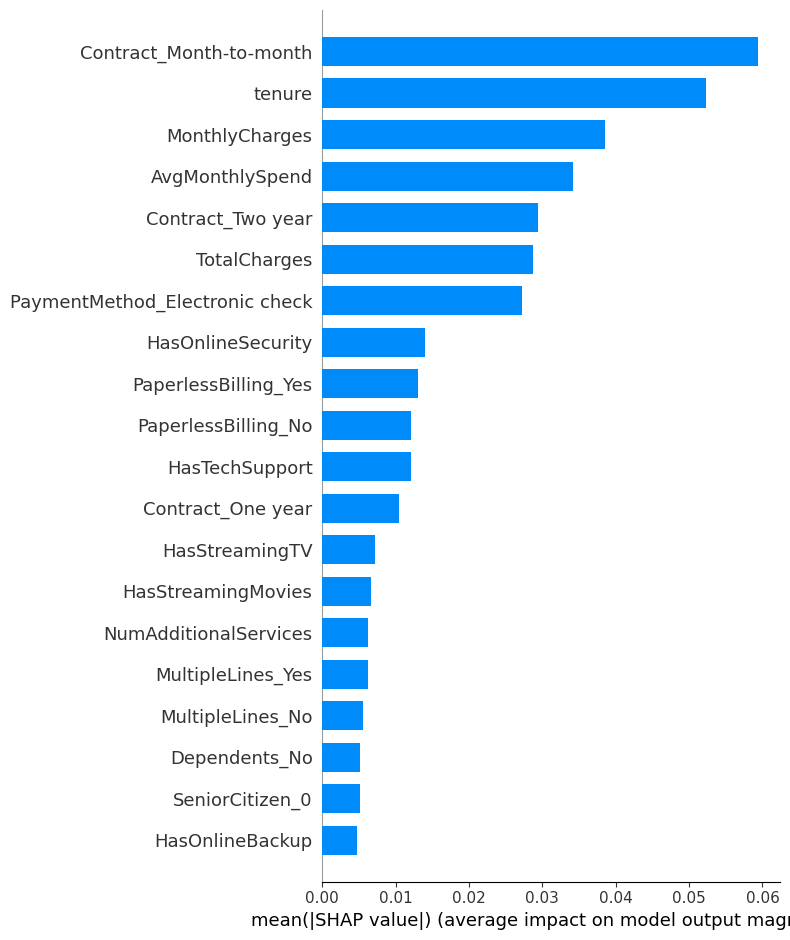

In [88]:
# Plot feature importance (summary plot - bar)
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values[1], X_train_processed_df, plot_type="bar", max_display=20)

## Recommended Business Actions

1. **Encourage Long-Term Contracts**

- Problem: Month-to-month contracts are strongly associated with higher churn.

- Action: Offer discounts, loyalty benefits, or limited-time offers to incentivize customers to switch to 1-year or 2-year contracts.

2. **Launch Tenure-Based Retention Campaigns**

- Problem: Customers with shorter tenure are more likely to churn.

- Action: Introduce milestone rewards (e.g., at 3, 6, 12 months) such as free upgrades or credits to build long-term loyalty.

3. **Target High Monthly Bill Customers with Added Value**

- Problem: Higher MonthlyCharges and AvgMonthlySpend correlate with churn.

- Action: Offer personalized plans, usage insights, or bundled discounts to show value and reduce perceived overcharging.

4. **Migrate Users from Electronic Check to Auto-Pay Methods**

- Problem: Users paying via Electronic check churn more frequently.

- Action: Educate and incentivize switching to more stable, lower-churn payment methods like credit card or auto-debit.

5. **Upsell Online Security Services**

- Problem: Lack of OnlineSecurity services is linked to higher churn.

- Action: Offer online security as part of promotional bundles or free trials to increase service adoption and stickiness.